In [1]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


In [2]:
w = np.array([1, -2, 3])
b = -np.pi
x = np.array([-2, 1, -1])

z = np.dot(w, x) + b
y = tanh(z)

print(f"z = {z:.4f}")
print(f"y = {y:.6f}")


z = -10.1416
y = -1.000000


In [3]:
w = np.array([1, -2, 3])
b = -np.pi
x = np.array([-2, 1, -1])

# Hidden layer
z_hidden = np.dot(w, x) + b
h1 = h2 = h3 = tanh(z_hidden)
hidden_output = np.array([h1, h2, h3])

# Output layer
z_output = np.dot(w, hidden_output) + b
y = tanh(z_output)

print(f"Hidden: {h1:.6f}")
print(f"Output: {y:.6f}")


Hidden: -1.000000
Output: -0.999932


In [4]:
X_data = np.array([[24, 168, 59],
                   [29, 195, 72],
                   [31, 187, 78],
                   [26, 155, 54]])

y_true = np.array([1, 0, 0, 1])

w = np.array([1, -2, 3])
b = -np.pi

y_pred = []
for i in range(len(X_data)):
    z_i = np.dot(w, X_data[i]) + b
    y_pred.append(tanh(z_i))

y_pred = np.array(y_pred)
mse = np.mean((y_true - y_pred)**2)
print(f"MSE: {mse:.6f}")


MSE: 2.500000


In [5]:
x_alice = np.array([24, 168, 59])
y_true_alice = 1

z = np.dot(w, x_alice) + b
y_pred = tanh(z)
loss = (y_true_alice - y_pred)**2

# Backpropagation
dL_dy = 2 * (y_pred - y_true_alice)
dy_dz = tanh_derivative(z)
dL_dz = dL_dy * dy_dz

dL_dw1 = dL_dz * x_alice[0]
dL_dw2 = dL_dz * x_alice[1]
dL_dw3 = dL_dz * x_alice[2]
dL_db = dL_dz

print(f"∂L/∂w₁ = {dL_dw1:.6f}")
print(f"∂L/∂w₂ = {dL_dw2:.6f}")
print(f"∂L/∂w₃ = {dL_dw3:.6f}")
print(f"∂L/∂b = {dL_db:.6f}")


∂L/∂w₁ = -0.000000
∂L/∂w₂ = -0.000000
∂L/∂w₃ = -0.000000
∂L/∂b = -0.000000


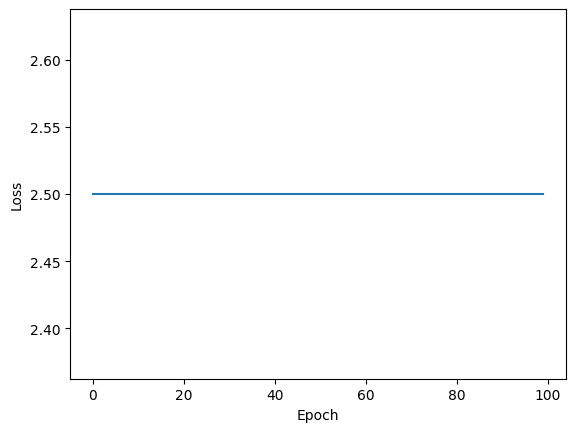

Final loss: 2.500000


In [6]:
w_train = np.array([1.0, -2.0, 3.0])
b_train = -np.pi
learning_rate = 0.1
epochs = 100
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(X_data)):
        x_i = X_data[i]
        y_true_i = y_true[i]
        
        z_i = np.dot(w_train, x_i) + b_train
        y_pred_i = tanh(z_i)
        loss_i = (y_true_i - y_pred_i)**2
        epoch_loss += loss_i
        
        dL_dy = 2 * (y_pred_i - y_true_i)
        dy_dz = tanh_derivative(z_i)
        dL_dz = dL_dy * dy_dz
        
        w_train = w_train - learning_rate * dL_dz * x_i
        b_train = b_train - learning_rate * dL_dz
    
    loss_history.append(epoch_loss / len(X_data))

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

print(f"Final loss: {loss_history[-1]:.6f}")
